In [148]:
# %pip install tensorflow
# %pip install keras

# %pip install --upgrade keras
# %pip install --upgrade keras-cv
# %pip install --upgrade keras-hub
# %pip install --upgrade keras
# %pip install --upgrade typing_extensions

# info http://neuralnetworksanddeeplearning.com/chap1.html

In [149]:
# Importiere TensorFlow (bereits in dieser Zelle importiert, kann aber wiederholt werden)
import tensorflow as tf

# Lade das MNIST-Datenset und teile es in Trainings- und Testdaten auf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Prüfe, ob die Datensätze die erwarteten Formen haben
assert x_train.shape == (60000, 28, 28) # Input 
assert x_test.shape == (10000, 28, 28)  # Input
assert y_train.shape == (60000,)        # Feature/Label
assert y_test.shape == (10000,)         # Feature/Label

# Erstelle ein tf.data.Dataset aus dem Trainingsdatensatz
# Dabei werden die Bilder und Labels als Dictionary abgelegt, um später über die Schlüssel zugreifen zu können
ds = tf.data.Dataset.from_tensor_slices({"image": x_train, "label": y_train})


In [150]:
# model = tf.keras.Sequential([
#   # Input layer with explicit channel (28x28 with 1 channel)
#   tf.keras.layers.Input(shape=(28, 28, 1)),
#   tf.keras.layers.Flatten(),  # shape=(28, 28, 1) -> shape=(784,)

#   # Hidden Layers 
#   tf.keras.layers.Dense(28, activation="relu"), 
#   tf.keras.layers.Dense(28, activation="sigmoid"),   

#   # Output layer Digits 0-9
#   tf.keras.layers.Dense(10, activation="softmax")
# ])

In [151]:
model = tf.keras.Sequential([
  # Input layer with explicit channel (28x28 with 1 channel)
  tf.keras.layers.Input(shape=(28, 28, 1)),
  tf.keras.layers.Flatten(),  # shape=(28, 28, 1) -> shape=(784,)

  # Hidden Layers not 16/16 like in Video beecause : testing
  tf.keras.layers.Dense(32, activation="relu"), 
  tf.keras.layers.Dense(16, activation="sigmoid"), 
  

  # Output layer Digits 0-9
  tf.keras.layers.Dense(10, activation="softmax")
])

In [152]:
model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [ ]:

model.fit(x_train, y_train, epochs=5)
loss, accuracy = model.evaluate(x_test, y_test)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5990 - loss: 1.3854
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8581 - loss: 0.5164
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8832 - loss: 0.4222
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8957 - loss: 0.3753
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9010 - loss: 0.3602
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8904 - loss: 0.3808


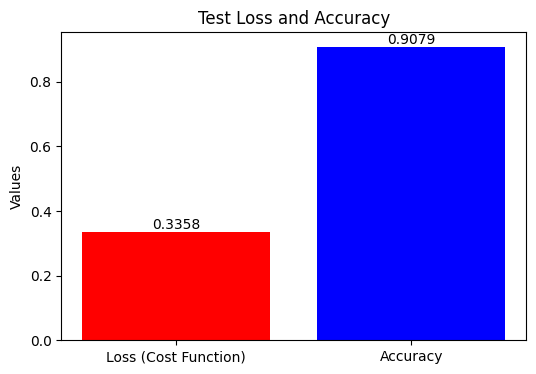

In [154]:
import matplotlib.pyplot as plt

# Prepare data for the diagram
metrics = ['Loss (Cost Function)', 'Accuracy']
values = [loss, accuracy]

plt.figure(figsize=(6, 4))
bars = plt.bar(metrics, values, color=['red', 'blue'])
plt.ylabel('Values')
plt.title('Test Loss and Accuracy')

# Annotate each bar with its value
for bar in bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val, f'{y_val:.4f}', ha='center', va='bottom')
    
plt.show()

In [155]:
model.save("mein_modell.keras")  # Speichert Architektur, Gewichte und Optimizer-Zustand
model.save_weights("gewichte.weights.h5")  # Nur Gewichte speichern (Architektur muss später neu definiert werden)

In [156]:
from tensorflow.keras.models import load_model

geladenes_modell = load_model("mein_modell.keras")
geladenes_modell.summary()  # Zeigt die Architektur an

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_18 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,456 (302.57 KB)

 Trainable params: 25,818 (100.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 51,638 (201.71 KB)